In [1]:
import numpy as np
from skimage import measure
import fix_segmentation_spot as spot

def splitSpots(image):
    labels = measure.label(image, background=0)
    list_of_spots = []
    for label in np.unique(labels):
        if label == 0:
            continue
        labelMask = np.zeros(image.shape, dtype="uint8")
        labelMask[labels == label] = 1
        list_of_spots.append(labelMask)
    return list_of_spots

def checkForSpots(image):
    spots = splitSpots(image)
    number = len(spots)
    if number > 1:
        return True
    else:
        return False

def spotArea(spots):
    area = []
    i = 0
    for spot in spots:
        count = (spot == 1).sum()
        area.append([count, i])
        i += 1
    area.sort()
    sort_index = []
    for x in area:
        sort_index.append(x[1])
    return sort_index

def fixSpots(image, arm):
    main_image = image
    image = image[arm]
    size = image.shape
    image = image.astype(int)
    list_of_spots = splitSpots(image)
    number_of_spots = len(list_of_spots)
    small_big_spot_index = spotArea(list_of_spots)

    unwanted_spot = []
    for i in range(number_of_spots - 1):
        small_index = small_big_spot_index[i]
        unwanted_spot.append(list_of_spots[small_index])

    wanted_spot = list_of_spots[small_big_spot_index[-1]]

    torso = main_image[1]
    for t in range(number_of_spots - 1):
        for i in range(size[0]):
            for j in range(size[1]):
                if unwanted_spot[t][i][j] == 1:
                    torso[i][j] = 1
    main_image[1] = torso
    main_image[arm] = wanted_spot
    return main_image

In [2]:
with open('defect.npy', 'rb') as f:
    hole_hand = np.load(f)

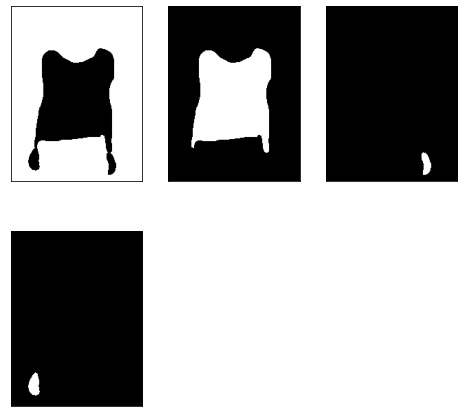

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 20))

for i in range(4):
    ax = fig.add_subplot(5, 3, i+1)
    plt.imshow(hole_hand[0][i],cmap='gray')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
plt.show()

In [5]:
if (spot.checkForSpots(hole_hand[0][2])): # right arm
    print("Right arm needs fixing")
    armlabel_map_needs_updating = True
    fixed_segment = fixSpots(hole_hand[0], 2)
    hole_hand[0][1] = fixed_segment[1]

#checkForSpots(hole_hand[0])

Right arm needs fixing


In [ ]:
fixSpots